# PROBLEM -- 1

# Importing Necessary Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Data Ingestion:

# 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. 

In [2]:
# loding data
elections  = pd.read_excel(r'C:\Users\abhay\Downloads\Election_Data.xlsx', sheet_name = 'Election_Dataset_Two Classes')

In [3]:
# checking of the data if loaded correctly
print("top 5 observations in data")
elections.head()

top 5 observations in data


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# dropping the 1st column as its just sl.no./ID and will not play any part in further analysis
elections.drop("Unnamed: 0",axis=1,inplace =True)

In [5]:
# checking info of data
elections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
# checking shape of dataset
print("The shape of dataset is :{}".format(elections.shape))

The shape of dataset is :(1525, 9)


In [7]:
# describing data
elections.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
# describing data including object variable as well
elections.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# checking for null values
elections.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [10]:
# checking for duplicate values
print("Number of duplicate rows:",elections.duplicated().sum())

Number of duplicate rows: 8


In [11]:
#removing duplicates
elections.drop_duplicates(inplace=True) 

In [12]:
# checking for duplicates after removing duplicates
print("Number of duplicate rows after deleting duplicates:",elections.duplicated().sum())

Number of duplicate rows after deleting duplicates: 0


In [13]:
# checking shape of dataset after removing duplicates
print("The shape of dataset is :{}".format(elections.shape))

The shape of dataset is :(1517, 9)


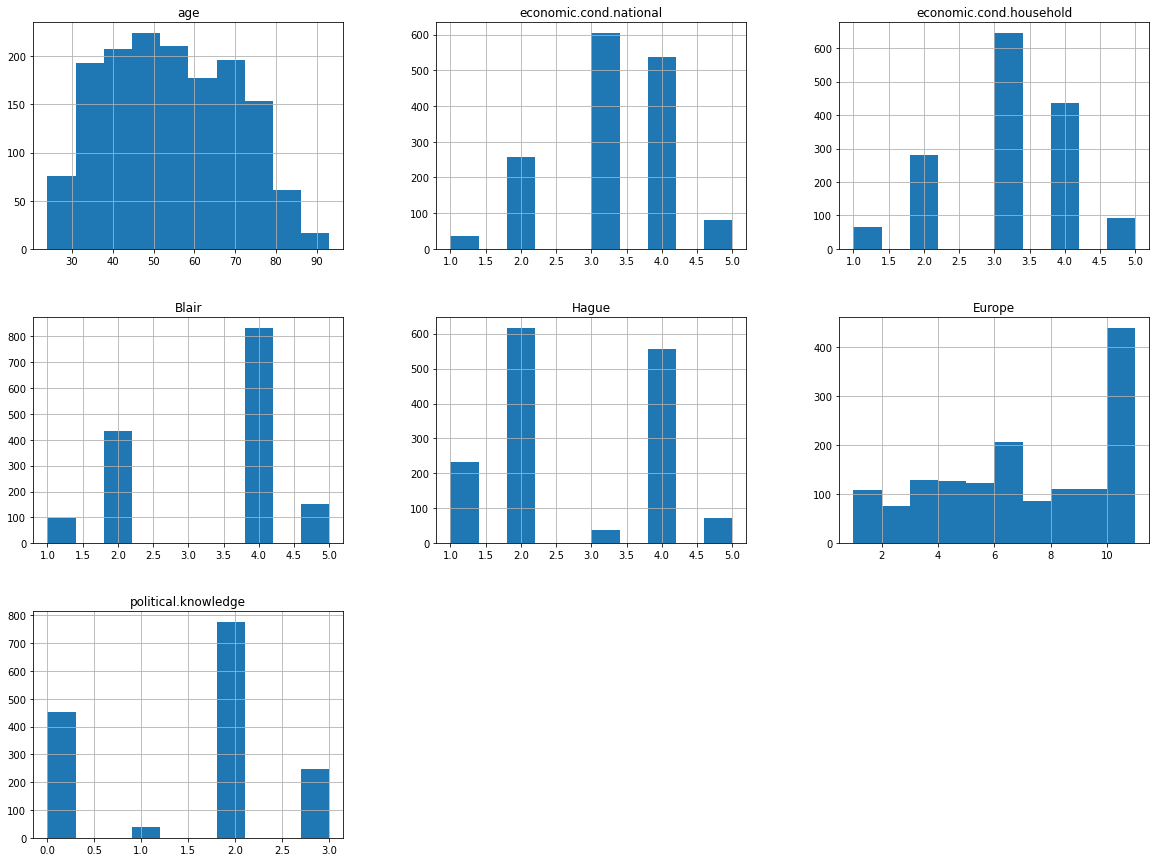

In [14]:
#checking for skewness
elections.hist(figsize=(20,15));

In [15]:
# kest check kurtosis and skewness of data
print("kurtosis and skewness of dataste is as below")
pd.DataFrame(data = [elections.kurtosis(), elections.skew()], index=['Kurtosis','Skewness']).T.round(2)

kurtosis and skewness of dataste is as below


,Kurtosis,Skewness
age,-0.94,0.14
economic.cond.national,-0.26,-0.24
economic.cond.household,-0.21,-0.14
Blair,-1.06,-0.54
Hague,-1.40,0.15
Europe,-1.24,-0.14
political.knowledge,-1.22,-0.42


In [16]:
#checking standard deviations of each variable
print("standard deviation of variables")
print(elections.std())

standard deviation of variables
age                        15.701741
economic.cond.national      0.881792
economic.cond.household     0.931069
Blair                       1.174772
Hague                       1.232479
Europe                      3.299043
political.knowledge         1.084417
dtype: float64


# 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers.

Uni-variate Analysis

<AxesSubplot:>

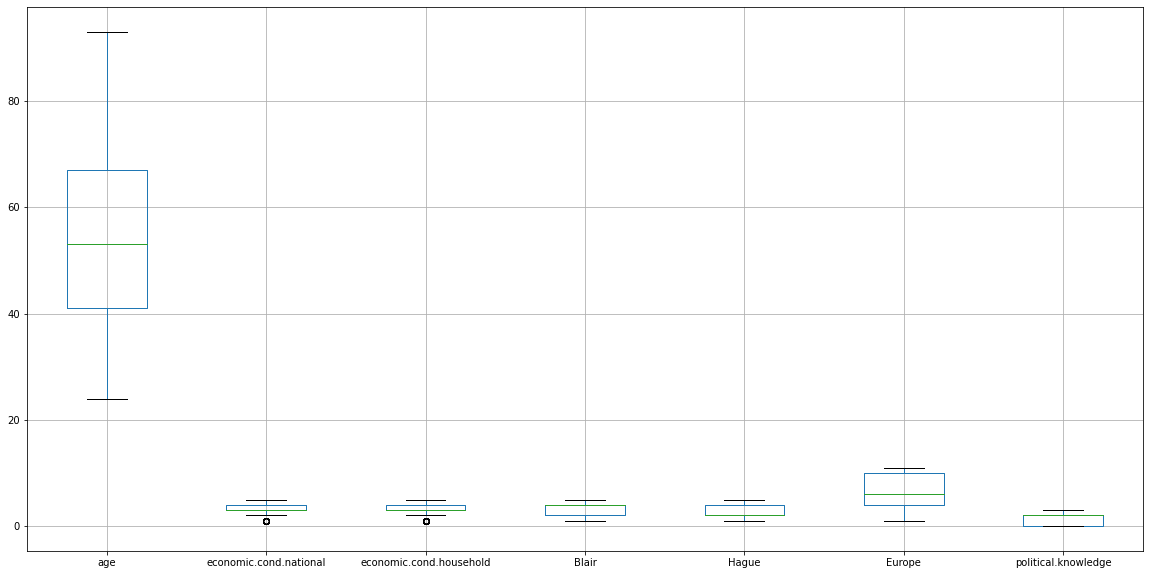

In [17]:
# to perform uni-variate analysis on continous variable, lets plot the box plots and distribution plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#checking for outliers using box plot
elections.boxplot(figsize=(20,10))

In [18]:
# lets check the percentage of outlier in each column
Q1 = elections.quantile(0.25)
Q3 = elections.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((elections < (Q1 - 1.5 * IQR)) | (elections > (Q3 + 1.5 * IQR))).sum()/elections.shape[0]*100),
            columns = ['outlier %'], index = None). round(2)

C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """
C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,outlier %
Blair,0.00
Europe,0.00
Hague,0.00
age,0.00
economic.cond.household,4.28
economic.cond.national,2.44
gender,0.00
political.knowledge,0.00
vote,0.00


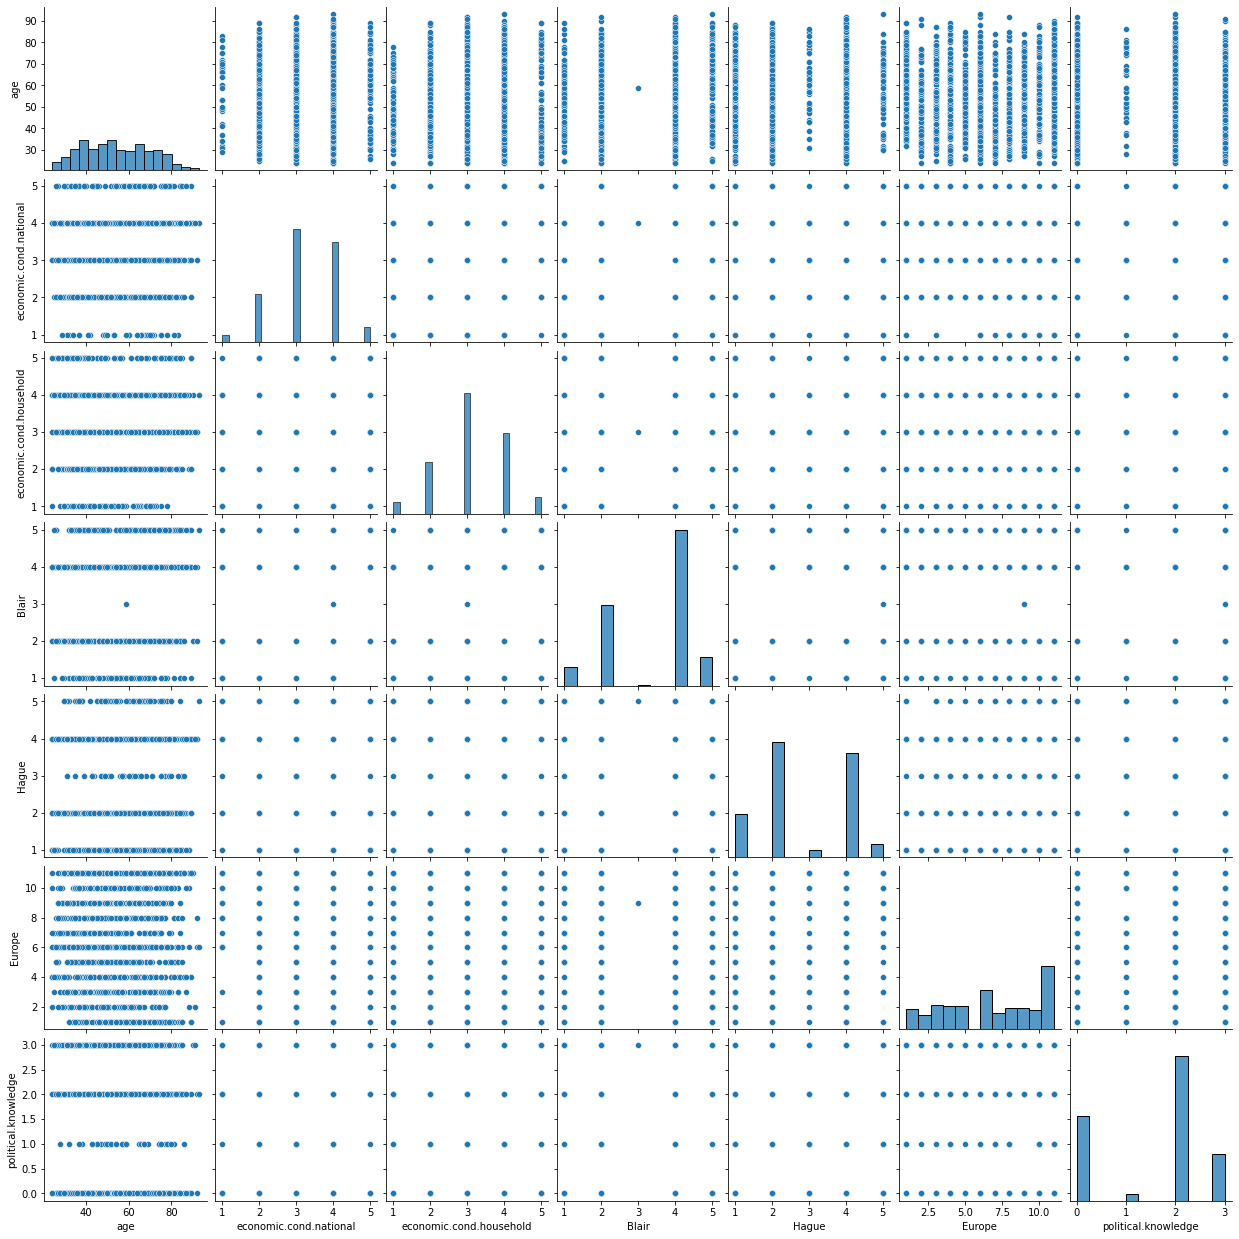

In [19]:
#the pair plot:-
sns.pairplot(data = elections)
plt.show()

In [20]:
#checking covariance
elections.cov()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,246.544655,0.258740,-0.568222,0.591818,0.602692,3.344366,-0.793429
economic.cond.national,0.258740,0.777558,0.285454,0.337851,-0.218216,-0.608432,-0.022481
economic.cond.household,-0.568222,0.285454,0.866890,0.236065,-0.115202,-0.346780,-0.038900
Blair,0.591818,0.337851,0.236065,1.380089,-0.352571,-1.146966,-0.027134
Hague,0.602692,-0.218216,-0.115202,-0.352571,1.519005,1.161811,-0.039970
Europe,3.344366,-0.608432,-0.346780,-1.146966,1.161811,10.883687,-0.540915
political.knowledge,-0.793429,-0.022481,-0.038900,-0.027134,-0.039970,-0.540915,1.175961


In [21]:
#checking correlation
elections.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


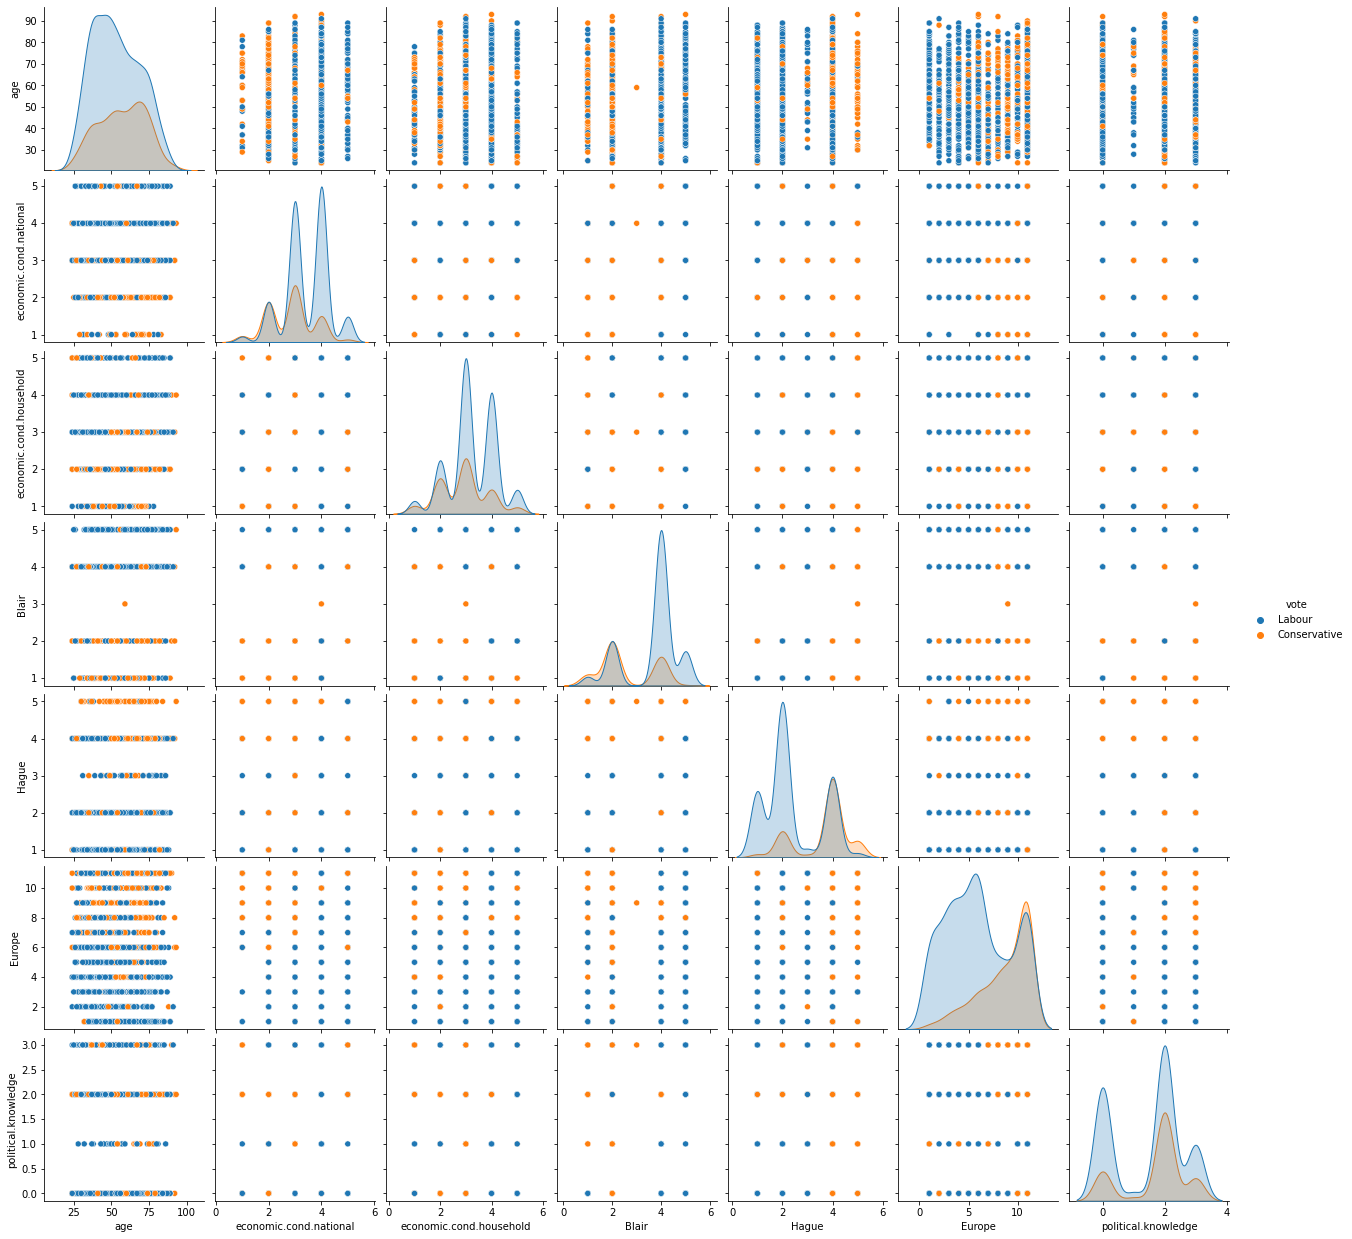

In [22]:
# plotting sns plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pair plot to check on data distribution and co-linearity
sns.pairplot(elections, hue = 'vote', diag_kind='kde')  
plt.show()

In [23]:
#checking if the data is balanced or not
elections.groupby(["vote"]).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
Conservative,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057


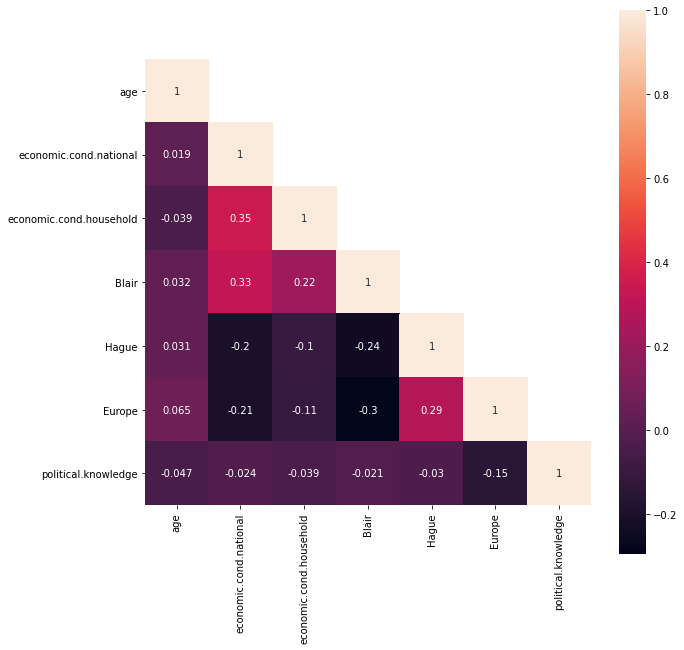

In [24]:
# plotting heatmap of correlation
cor = elections.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask, vmax=1, square=True, annot=True)
plt.show()

In [25]:
# checking data distribution of categorical object data types
for column in elections.columns:
    if elections[column].dtype == 'object':
        print(column.upper(),': ',elections[column].nunique())
        print(elections[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




Bivariate and Multivariate Analysis

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


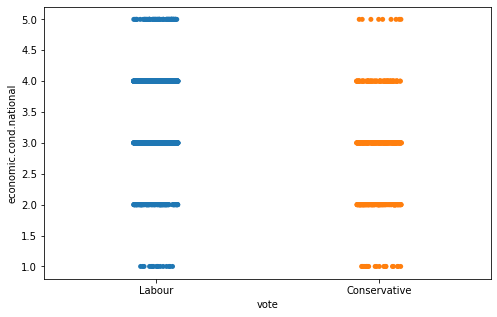

In [26]:
# plotting strip plot for variable's "labour" and "Conservative"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['economic.cond.national'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


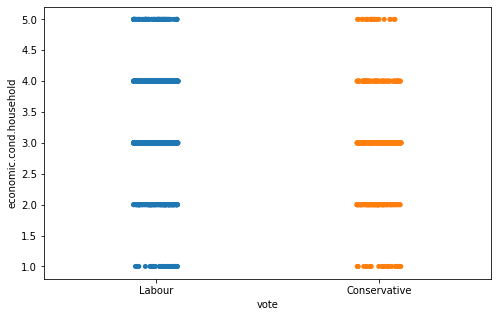

In [27]:
# plotting strip plot for variable's "vote" and "economic.cond.household"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['economic.cond.household'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


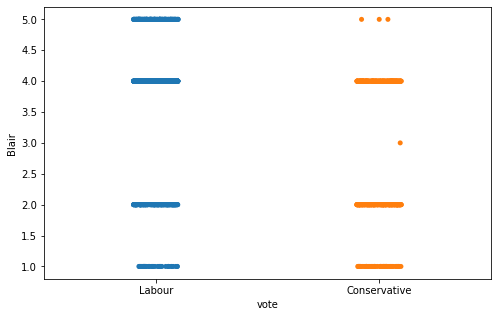

In [28]:
# plotting strip plot for variable's "vote" and "Blair"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['Blair'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


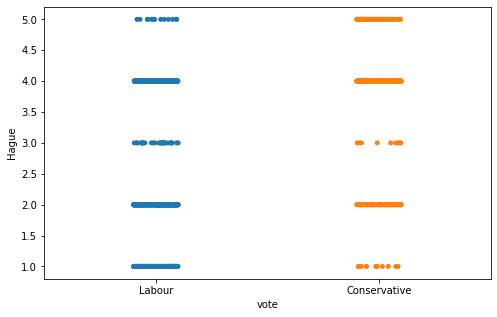

In [29]:
# plotting strip plot for variable's "vote" and "Hague"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['Hague'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


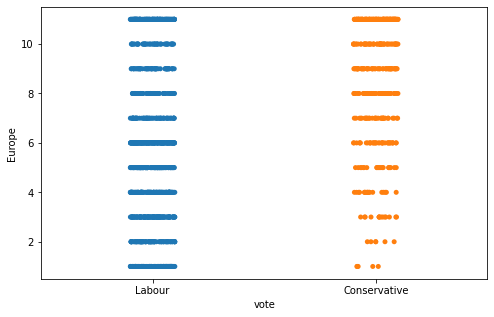

In [30]:
# plotting strip plots for variable's "vote" adn "Europe"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['Europe'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


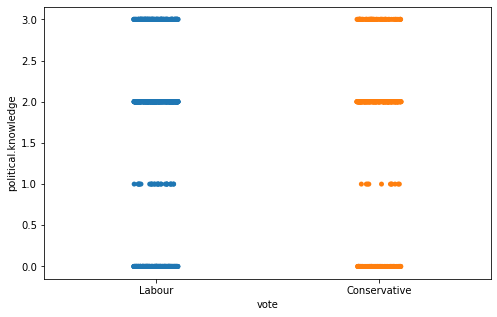

In [31]:
# plotting strip plot for variable's "vote" and "Political.knowledge"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['political.knowledge'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


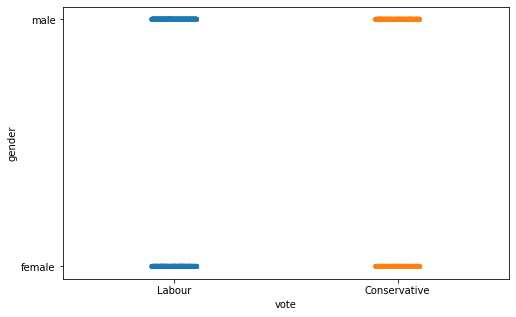

In [32]:
# plotting strip plot for variable's "vote" and "gender"
plt.figure(figsize=(8,5))
sns.stripplot(elections["vote"], elections['gender'], jitter=True) 
plt.show()

C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\abhay\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and w

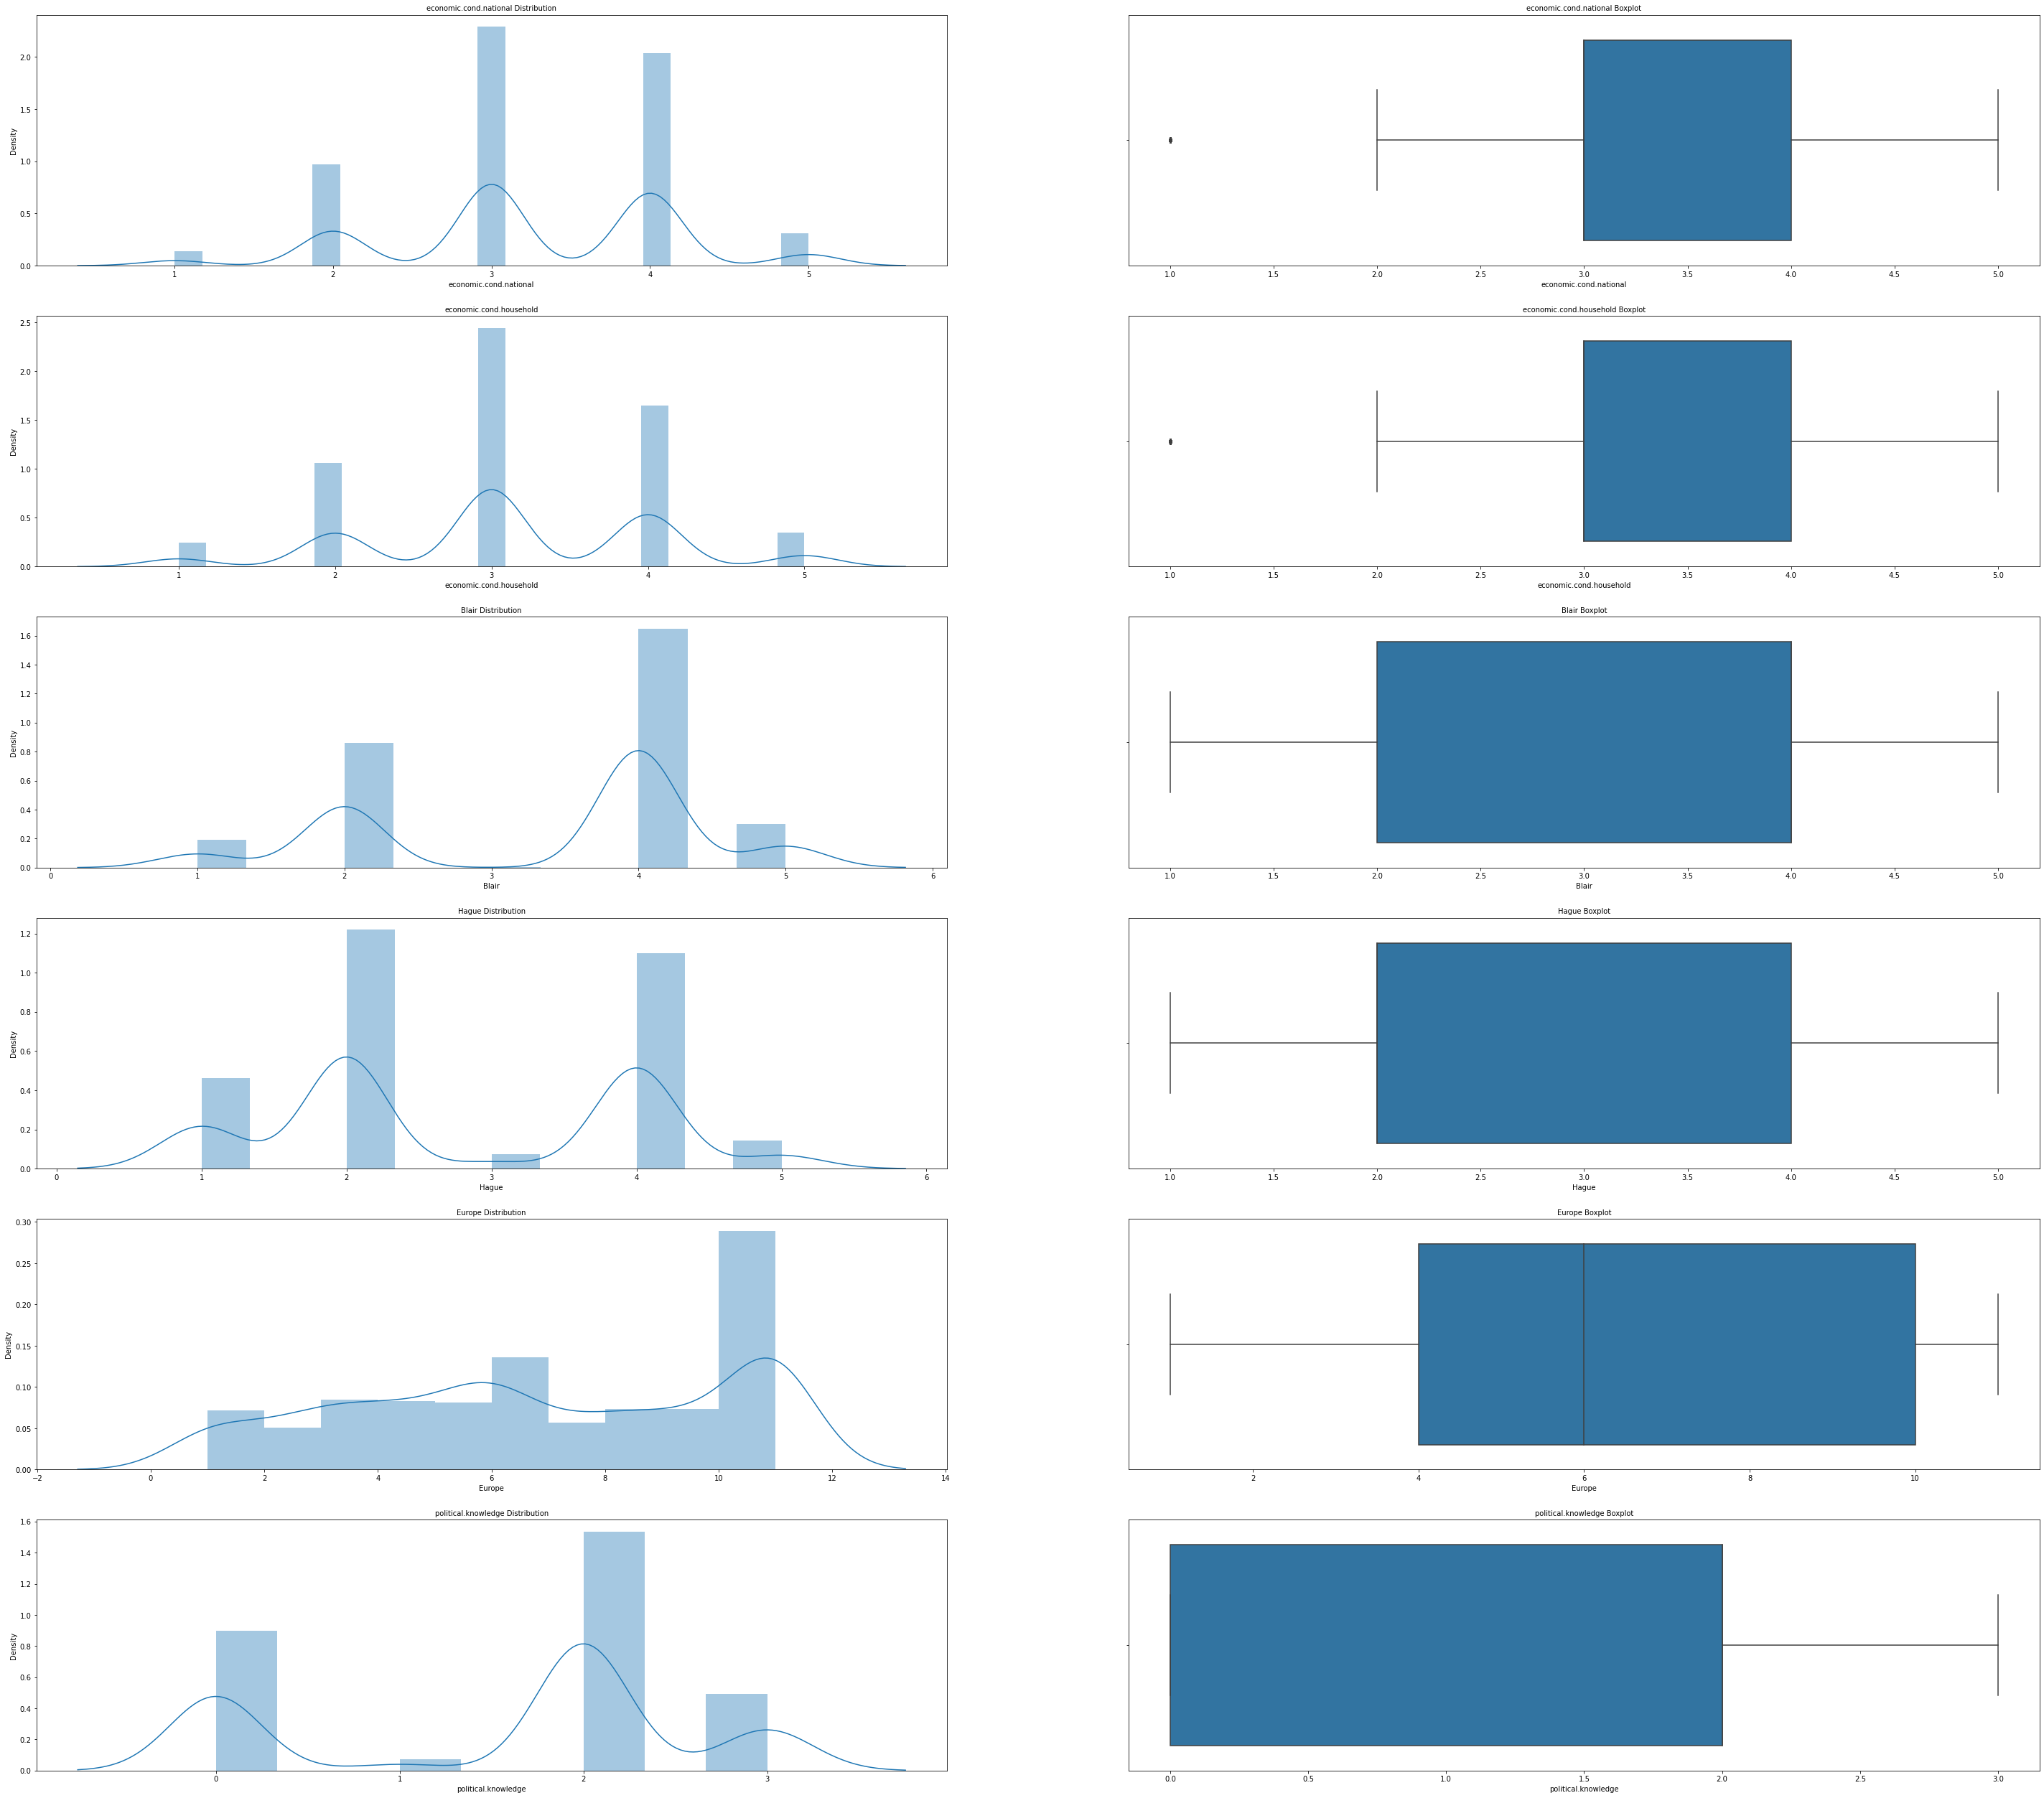

In [33]:
# plotting dist plat and boxplot for all variables
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(50,45)

a = sns.distplot(elections['economic.cond.national'] , ax=axes[0][0])
a.set_title("economic.cond.national Distribution",fontsize=10)
a = sns.boxplot(elections['economic.cond.national'] , orient = "v" , ax=axes[0][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)

a = sns.distplot(elections['economic.cond.household'] , ax=axes[1][0])
a.set_title("economic.cond.household",fontsize=10)
a = sns.boxplot(elections['economic.cond.household'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)

a = sns.distplot(elections['Blair'] , ax=axes[2][0])
a.set_title("Blair Distribution",fontsize=10)
a = sns.boxplot(elections['Blair'] , orient = "v" , ax=axes[2][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(elections['Hague'] , ax=axes[3][0])
a.set_title("Hague Distribution",fontsize=10)
a = sns.boxplot(elections['Hague'] , orient = "v" , ax=axes[3][1])
a.set_title("Hague Boxplot",fontsize=10)


a = sns.distplot(elections['Europe'] , ax=axes[4][0])
a.set_title("Europe Distribution",fontsize=10)
a = sns.boxplot(elections['Europe'] , orient = "v" , ax=axes[4][1])
a.set_title("Europe Boxplot",fontsize=10)


a = sns.distplot(elections['political.knowledge'] , ax=axes[5][0])
a.set_title("political.knowledge Distribution",fontsize=10)
a = sns.boxplot(elections['political.knowledge'] , orient = "v" , ax=axes[5][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

plt.show()

# Data Preparation:

# 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [34]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [35]:
# labelling the variable "vote" and "gender"
elections['vote'] = LE.fit_transform(elections['vote'])
elections['gender'] = LE.fit_transform(elections['gender'])
elections.head()

# gender= Female = 0, male = 1
# vote= Labour = 1, conservative = 0

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [36]:
# checking info again after encoding columns with string data types.
elections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1517 non-null   int32
 1   age                      1517 non-null   int64
 2   economic.cond.national   1517 non-null   int64
 3   economic.cond.household  1517 non-null   int64
 4   Blair                    1517 non-null   int64
 5   Hague                    1517 non-null   int64
 6   Europe                   1517 non-null   int64
 7   political.knowledge      1517 non-null   int64
 8   gender                   1517 non-null   int32
dtypes: int32(2), int64(7)
memory usage: 139.0 KB


In [37]:
# getting unique value counts for "vote" variable
elections["vote"].value_counts()

1    1057
0     460
Name: vote, dtype: int64

In [38]:
# getting unique value counts for "economic.cond.national" variable
elections["economic.cond.national"].value_counts()

3    604
4    538
2    256
5     82
1     37
Name: economic.cond.national, dtype: int64

In [39]:
# getting unique value counts for "economic.cond.household" variable
elections["economic.cond.household"].value_counts()

3    645
4    435
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [40]:
# getting unique value counts for "Blair" variable
elections["Blair"].value_counts()

4    833
2    434
5    152
1     97
3      1
Name: Blair, dtype: int64

In [41]:
# getting unique value counts for "Hague" variable
elections["Hague"].value_counts()

2    617
4    557
1    233
5     73
3     37
Name: Hague, dtype: int64

In [42]:
# getting unique value counts for "Europe" variable
elections["Europe"].value_counts()

11    338
6     207
3     128
4     126
5     123
8     111
9     111
1     109
10    101
7      86
2      77
Name: Europe, dtype: int64

In [43]:
# getting unique value counts for "political.knowledge" variable
elections["political.knowledge"].value_counts()

2    776
0    454
3    249
1     38
Name: political.knowledge, dtype: int64

In [44]:
# getting unique value counts for "gender" variable
elections["gender"].value_counts()

0    808
1    709
Name: gender, dtype: int64

In [45]:
# splitting data into independent and dependent variables
X = elections.drop('vote' , axis=1)

y = elections.pop("vote")

In [46]:
#splitting data into train and test data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [47]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)


# Modeling:

# 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). 

# Building Logistic Regression Model

In [48]:
# building Logistic regression model
# Fit the model on original data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Fit the Logistic Regression model
lg = LogisticRegression(random_state=1)
lg.fit(X_train, y_train)

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=1)

The above model has been bulit with default hyperparameter values which is
-- pelanty as l2
-- Random State as None
-- Inverse Of regularization as 1.0
-- Solver as Ibfgs
-- Max itteration as default

In [49]:
# predict on train and test data set
ytrain_predict_lg = lg.predict(X_train) # can compare with y_train
ytest_predict_lg = lg.predict(X_test) # can compare with y_test

In [50]:
#Accuracy - Training Data
print("Accuracy of training dataset:",lg.score(X_train, y_train))

Accuracy of training dataset: 0.8350612629594723


In [51]:
# Accuracy - Test Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.8245614035087719


In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
# confusion matrix for train data set
print("Confusion Matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lg)

Confusion Matrix for train dataset


array([[199, 108],
       [ 67, 687]], dtype=int64)

In [53]:
# confusion matrix for test data set
print("Confusion Matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lg)

Confusion Matrix for test dataset


array([[110,  43],
       [ 37, 266]], dtype=int64)

In [54]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [55]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lg))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.75      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [56]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lg))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.75      0.72      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC score and ROC curve for training dataset
AUC: 0.890


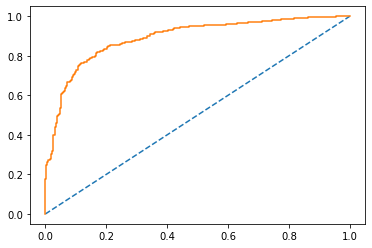

In [57]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.890


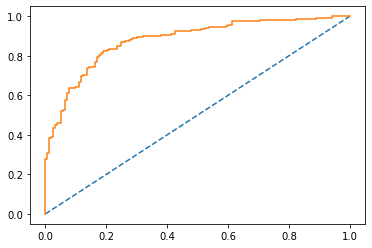

In [58]:
# creating ROC curve and getting AUC score for test data set
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [59]:
from sklearn.model_selection import cross_val_score
print("cross validation scroes for traning dataset")
scores_lg_train = cross_val_score(lg, X_train, y_train, cv=10)
scores_lg_train

cross validation scroes for traning dataset


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.82242991, 0.77358491, 0.83962264, 0.86792453, 0.85849057,
       0.8490566 , 0.81132075, 0.8490566 , 0.81132075, 0.83018868])

In [60]:
print("cross calidation scores for testing dataset")
scores_lg_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lg_test

cross calidation scores for testing dataset


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.80434783, 0.7826087 , 0.84782609, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.73333333, 0.82222222])

# Using GridSearchCV for logistic regression

In [61]:
# loading GridSearchCV and creating dataframe for parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['lbfgs','newton-cg', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1','l2','none'],
    'tol':[0.0001,0.00001]
}

grid_search = GridSearchCV(estimator = lg, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [62]:
# fitting grid search into traing dataset
grid_search.fit(X_train, y_train)

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.88621045 0.88621045
        nan        nan 0.8797198  0.8797198  0.88478551 0.88478551
 0.88478551 0.88478551 0.88572589 0.88503576 0.87998319 0.87998319
 0.87956187 0.87956187 0.88410468 0.88410468 0.88410468 0.88410468
        nan        nan 0.8805559  0.8805559  0.87956187 0.87956187]
  category=UserWarning


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [63]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}

In [64]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [65]:
# predicting training and testing dataset
ytrain_predict_lgcv = best_grid.predict(X_train)
ytest_predict_lgcv = best_grid.predict(X_test)

In [66]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8360037700282752


In [67]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8289473684210527


In [68]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_lgcv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.76      0.64      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [69]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgcv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [70]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
confusion_matrix(y_train, ytrain_predict_lgcv)

confusion matrix for train dataset


array([[196, 111],
       [ 63, 691]], dtype=int64)

In [71]:
# confusion matrix of train dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgcv)

confusion matrix for test dataset


array([[110,  43],
       [ 35, 268]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.890


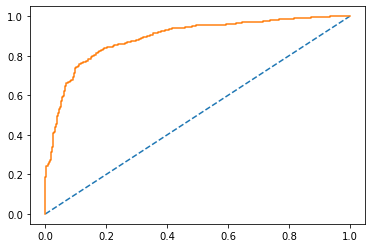

In [72]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.881


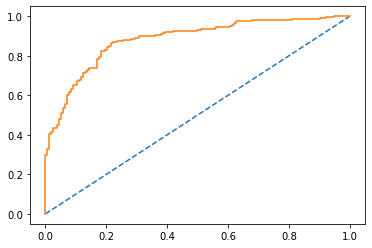

In [73]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [74]:
print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_lgcv_train

cross validation score for training dataset


array([0.8317757 , 0.77358491, 0.83962264, 0.85849057, 0.87735849,
       0.8490566 , 0.81132075, 0.85849057, 0.81132075, 0.82075472])

In [75]:
print("cross calidation score for testing dataset")
scores_lgcv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_lgcv_test

cross calidation score for testing dataset


array([0.7826087 , 0.76086957, 0.84782609, 0.82608696, 0.89130435,
       0.86956522, 0.91111111, 0.84444444, 0.73333333, 0.82222222])

# Building Logistic regression model using SMOTE

In [76]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [77]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [78]:
# Let's check the shape after SMOTE
X_train_res.shape

(1508, 8)

In [79]:
#fitting model into training dataset
lg.fit(X_train_res, y_train_res)

LogisticRegression(random_state=1)

In [80]:
# predict on train and test data set with balanced dataset
ytrain_predict_lgsm = lg.predict(X_train_res) # can compare with y_train
ytest_predict_lgsm = lg.predict(X_test) # can compare with y_test

In [81]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lg.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8395225464190982


In [82]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lg.score(X_test, y_test))

Accuracy of testing dataset: 0.7982456140350878


In [83]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_lgsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [84]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_lgsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.66      0.80      0.73       153
           1       0.89      0.80      0.84       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.78       456
weighted avg       0.81      0.80      0.80       456



In [85]:
# confusion matrix for train dataset
print("Confusion matrix for train dataset")
confusion_matrix(y_train_res, ytrain_predict_lgsm)

Confusion matrix for train dataset


array([[637, 117],
       [125, 629]], dtype=int64)

In [86]:
# confusion matrix for test dataset
print("Confusion matrix for test dataset")
confusion_matrix(y_test, ytest_predict_lgsm)

Confusion matrix for test dataset


array([[123,  30],
       [ 62, 241]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.910


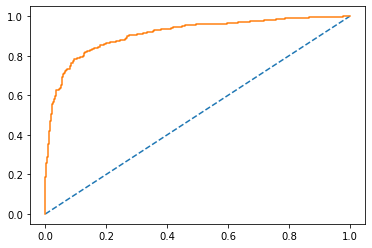

In [87]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.867


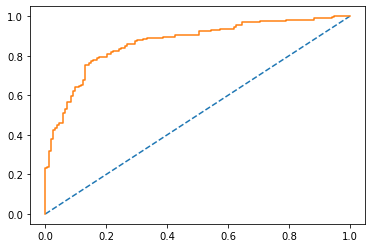

In [88]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [89]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(lg, X_train_res, y_train_res, cv=10)
scores_lgsm_train

cross validation score for balanced training dataset


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.76821192, 0.83443709, 0.82119205, 0.82119205, 0.90728477,
       0.81456954, 0.84768212, 0.86754967, 0.78666667, 0.89333333])

In [90]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(lg, X_test, y_test, cv=10)
scores_lgsm_test

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

cross validation score for testing dataset


C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.80434783, 0.7826087 , 0.84782609, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.73333333, 0.82222222])

# Building Linear Discriminant Analysis Model (LDA)

In [91]:
#building Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [92]:
# fitting LDA model into training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [93]:
# Training Data Class Prediction
ytrain_predict_lda = lda.predict(X_train)

# Test Data Class Prediction
ytest_predict_lda = lda.predict(X_test)

In [94]:
#Accuracy - Training dataset
print("Accuracy score of training dataset:",lda.score(X_train, y_train))

Accuracy score of training dataset: 0.8341187558906692


In [95]:
# Accuracy - Test Data
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of testing dataset: 0.8333333333333334


In [96]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, ytrain_predict_lda)

Confusion matrix of training dataset


array([[200, 107],
       [ 69, 685]], dtype=int64)

In [97]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, ytest_predict_lda)

Confusion matrix of testing dataset


array([[111,  42],
       [ 34, 269]], dtype=int64)

In [98]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [99]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.73      0.74       153
           1       0.86      0.89      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC score and ROC curve for training dataset
AUC: 0.867


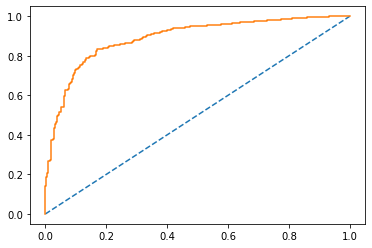

In [100]:
#creating ROC curve and getting AUC score for train data set
#predict probabilities
probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
train_auc1 = roc_auc_score(y_train, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.867


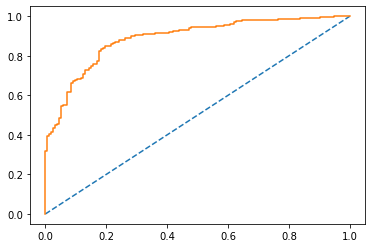

In [101]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [102]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.79439252, 0.77358491, 0.83962264, 0.85849057, 0.85849057,
       0.8490566 , 0.80188679, 0.8490566 , 0.81132075, 0.82075472])

In [103]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.80434783, 0.76086957, 0.86956522, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.75555556, 0.84444444])

# Building LDA model using GridSearchCV

In [104]:
# creating dataframe for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol' : [0.0001,0.0002,0.0003],
    'shrinkage' : ['auto', 'float', 'None'],
    
}

grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [105]:
# fitting model into training dataset
grid_search.fit(X_train, y_train)

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.88095926 0.88095926 0.88095926
 0.88095926 0.88095926 0.88095926        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
  category=UserWarning


GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='f1')

In [106]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.0001}

In [107]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [108]:
# predicting training and testing dataset
ytrain_predict_ldacv = best_grid.predict(X_train)
ytest_predict_ldacv = best_grid.predict(X_test)

In [109]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8331762488218661


In [110]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8355263157894737


In [111]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_ldacv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [112]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldacv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.83       456



In [113]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_ldacv)

confusuon matrix for training dataset


array([[200, 107],
       [ 70, 684]], dtype=int64)

In [114]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldacv)

confusuon matrix for testing dataset


array([[113,  40],
       [ 35, 268]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.890


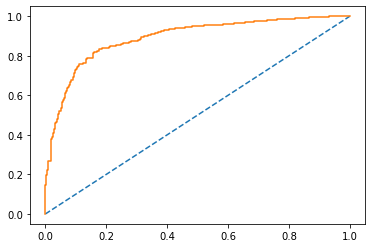

In [115]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.887


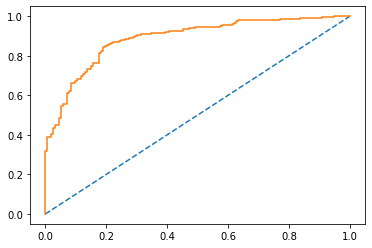

In [116]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [117]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_ldacv_train

cross validation scores for training dataset


array([0.79439252, 0.77358491, 0.85849057, 0.85849057, 0.85849057,
       0.85849057, 0.79245283, 0.8490566 , 0.81132075, 0.81132075])

In [118]:
print("cross validation scores from testing dataset")
scores_ldacv_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldacv_test

cross validation scores from testing dataset


array([0.80434783, 0.76086957, 0.86956522, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.75555556, 0.84444444])

# Building LDA model using SMOTE

In [119]:
#fitting model into training dataset
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [120]:
# predict on train and test data set with balanced dataset
ytrain_predict_ldasm = lda.predict(X_train_res) # can compare with y_train
ytest_predict_ldasm = lda.predict(X_test) # can compare with y_test

In [121]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8408488063660478


In [122]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of testing dataset: 0.8070175438596491


In [123]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       754
           1       0.85      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [124]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       153
           1       0.90      0.80      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.79       456
weighted avg       0.82      0.81      0.81       456



In [125]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[640, 114],
       [126, 628]], dtype=int64)

In [126]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[126,  27],
       [ 61, 242]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.910


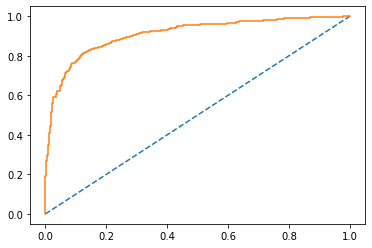

In [127]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.872


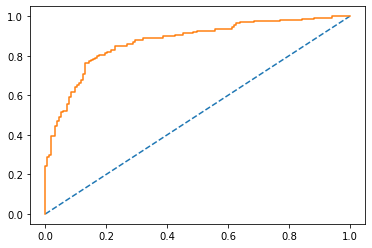

In [128]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [129]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.78145695, 0.84768212, 0.82781457, 0.82781457, 0.90728477,
       0.81456954, 0.82781457, 0.86754967, 0.78666667, 0.89333333])

In [130]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.80434783, 0.76086957, 0.86956522, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.75555556, 0.84444444])

# 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

# KNN Model

In [131]:
# building KNN model using the default hyper-parameter
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
## Performance Matrix on train data set
ytrain_predict_knn = knn.predict(X_train)
print("Accracy of training dataset:", knn.score(X_train, y_train))

Accracy of training dataset: 0.8529688972667295


In [133]:
print("confusion matrix of training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_knn))


confusion matrix of training dataset
[[204 103]
 [ 53 701]]


In [134]:
print("classificatoin report of training dataset")
print (classification_report(y_train, ytrain_predict_knn))

classificatoin report of training dataset
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [135]:
# Performance Matrix on test data set
ytest_predict_knn = knn.predict(X_test)
print("accuracy for testing dataset", knn.score(X_test, y_test))


accuracy for testing dataset 0.8157894736842105


In [136]:
print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_knn))


confusion matrix for testing dataset
[[ 99  54]
 [ 30 273]]


In [137]:
print("classsification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_knn))

classsification report for testing dataset
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC score and ROC curve for training dataset
AUC: 0.923


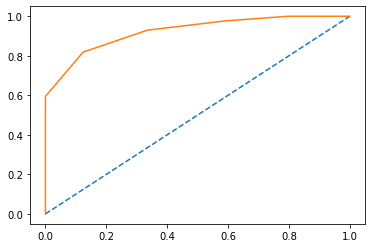

In [138]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.852


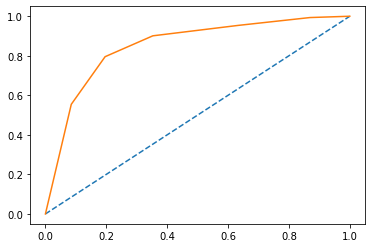

In [139]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [140]:
print("cross validation scores for train dataset")
scores_knn_train = cross_val_score(knn, X_train, y_train, cv=10)
scores_knn_train

cross validation scores for train dataset


array([0.80373832, 0.78301887, 0.76415094, 0.80188679, 0.82075472,
       0.81132075, 0.79245283, 0.82075472, 0.77358491, 0.77358491])

In [141]:
print("cross validation scores for test dataset")
scores_knn_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knn_test

cross validation scores for test dataset


array([0.76086957, 0.82608696, 0.80434783, 0.7173913 , 0.82608696,
       0.82608696, 0.82222222, 0.8       , 0.75555556, 0.73333333])

# Finding the right value for n_neighbor

In [142]:
# getting the ideal number of value of "N"
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17324561403508776,
 0.19517543859649122,
 0.19956140350877194,
 0.19956140350877194,
 0.1907894736842105,
 0.20394736842105265,
 0.19736842105263153]

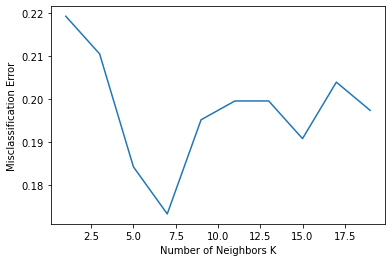

In [143]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [144]:
#from sklearn.neighbors import KNeighborsClassifier

knn7=KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [145]:
# Performance Matrix on train data set
ytrain_predict_knn7 = knn7.predict(X_train)
print("accuracy for training dataset:",knn7.score(X_train, y_train))

print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn7))

print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn7))

accuracy for training dataset: 0.8444863336475024
confusion matrix for training dataset
[[202 105]
 [ 60 694]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       307
           1       0.87      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



In [146]:
# Performance Matrix on test data set
ytest_predict_knn7 = knn7.predict(X_test)
print("accuracy score for testing dataset:",knn7.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn7))

print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn7))

accuracy score for testing dataset: 0.8267543859649122
confusion matrix for testing dataset
[[100  53]
 [ 26 277]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.79      0.65      0.72       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.78      0.80       456
weighted avg       0.82      0.83      0.82       456



In [147]:
0.8444863336475024 - 0.8267543859649122

0.01773194768259012

AUC score and ROC curve for training dataset
AUC: 0.917


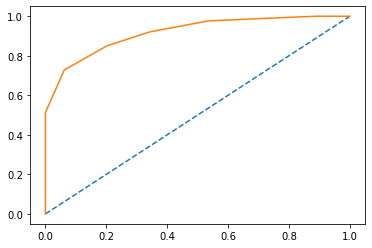

In [148]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn7.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.863


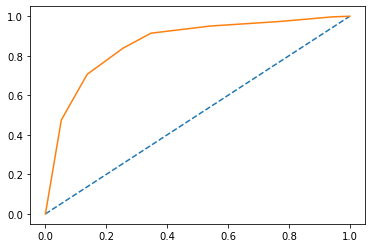

In [149]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn7.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [150]:
print("cross validation scores for training dataset")
scores_knn7_train = cross_val_score(knn7, X_train, y_train, cv=10)
scores_knn7_train

cross validation scores for training dataset


array([0.80373832, 0.78301887, 0.79245283, 0.81132075, 0.83962264,
       0.83962264, 0.78301887, 0.85849057, 0.76415094, 0.75471698])

In [151]:
print("cross validation scores for testing dataset")
scores_knn7_test = cross_val_score(knn7, X_test, y_test, cv=10)
scores_knn7_test

cross validation scores for testing dataset


array([0.76086957, 0.82608696, 0.82608696, 0.69565217, 0.89130435,
       0.80434783, 0.88888889, 0.68888889, 0.73333333, 0.71111111])

# Building KNN model using GridSearchCV

In [152]:
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 10, n_jobs=-1,scoring='f1')

In [153]:
# fitting gridsearchCV into training dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=19), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [154]:
# getting best parameters used out of all the combinations given in grid search
grid_search.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 9,
 'weights': 'uniform'}

In [155]:
# getting best estimators
best_grid = grid_search.best_estimator_

In [156]:
ytrain_predict_knncv = best_grid.predict(X_train)
ytest_predict_knncv = best_grid.predict(X_test)

In [157]:
#Accuracy - Training Data
print("Accuracy of training dataset after gridsearchCV:",best_grid.score(X_train, y_train))

Accuracy of training dataset after gridsearchCV: 0.8520263901979265


In [158]:
#Accuracy - testing Data
print("Accuracy of testing dataset after gridsearchCV:",best_grid.score(X_test, y_test))

Accuracy of testing dataset after gridsearchCV: 0.8026315789473685


In [159]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, ytrain_predict_knncv))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [160]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knncv))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       153
           1       0.82      0.89      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



In [161]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, ytrain_predict_knncv)

confusuon matrix for training dataset


array([[202, 105],
       [ 52, 702]], dtype=int64)

In [162]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knncv)

confusuon matrix for testing dataset


array([[ 95,  58],
       [ 32, 271]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.909


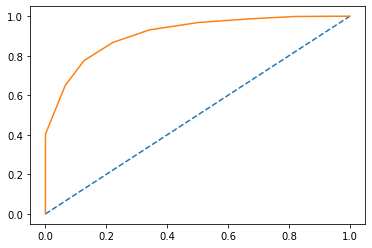

In [163]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.863


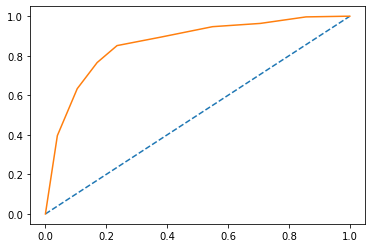

In [164]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [165]:
print("cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_grid, X_train, y_train, cv=10)
scores_knncv_train

cross validation scores for train dataset


array([0.8317757 , 0.78301887, 0.81132075, 0.82075472, 0.83962264,
       0.82075472, 0.77358491, 0.83962264, 0.79245283, 0.79245283])

In [166]:
print("cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_grid, X_test, y_test, cv=10)
scores_knncv_test

cross validation scores for test dataset


array([0.80434783, 0.7826087 , 0.82608696, 0.67391304, 0.86956522,
       0.73913043, 0.82222222, 0.82222222, 0.75555556, 0.71111111])

# Building KNN model over balanced dataset using SMOTE

In [167]:
#fitting model into training dataset
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=19)

In [168]:
# predict on train and test data set with balanced dataset
ytrain_predict_knnsm = knn.predict(X_train_res) # can compare with y_train
ytest_predict_knnsm = knn.predict(X_test) # can compare with y_test

In [169]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",knn.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8362068965517241


In [170]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",knn.score(X_test, y_test))

Accuracy of testing dataset: 0.7785087719298246


In [171]:
# getting classification report for train data set with balanced dataset
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_knnsm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       754
           1       0.89      0.77      0.82       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [172]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_knnsm))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.63      0.84      0.72       153
           1       0.90      0.75      0.82       303

    accuracy                           0.78       456
   macro avg       0.76      0.79      0.77       456
weighted avg       0.81      0.78      0.78       456



In [173]:
# confusion matrix for train dataset
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_knnsm)

confusion matrix for training dataset


array([[681,  73],
       [174, 580]], dtype=int64)

In [174]:
# confusion matrix for test dataset
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_knnsm)

confusion matrix for testing dataset


array([[128,  25],
       [ 76, 227]], dtype=int64)

AUC score and ROC curve for training dataset
AUC: 0.924


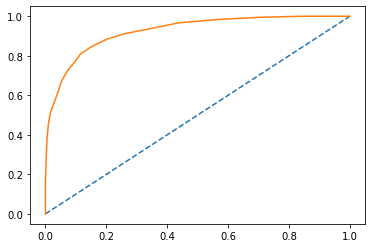

In [175]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.872


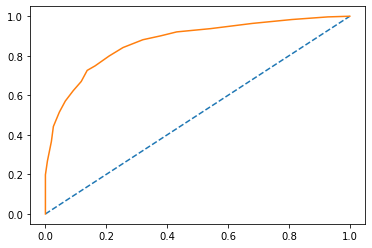

In [176]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [177]:
print("cross validation scores for train dataset")
scores_knnsm_train = cross_val_score(knn, X_train_res, y_train_res, cv=10)
scores_knnsm_train

cross validation scores for train dataset


array([0.78807947, 0.8410596 , 0.78145695, 0.78807947, 0.86092715,
       0.81456954, 0.80794702, 0.8807947 , 0.74      , 0.84      ])

In [178]:
print("cross validation scores for test dataset")
scores_knnsm_test = cross_val_score(knn, X_test, y_test, cv=10)
scores_knnsm_test

cross validation scores for test dataset


array([0.69565217, 0.76086957, 0.82608696, 0.60869565, 0.80434783,
       0.73913043, 0.84444444, 0.73333333, 0.71111111, 0.68888889])

# Building Gaussian Naive Bayes

In [179]:
#importing libraries to build NB model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [180]:
# fitting NB model into training dataset
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [181]:
# predicting and checking accoracy on training dataset
ytrain_predict_nb = nb.predict(X_train)
print("Accracy of training dataset:", nb.score(X_train, y_train))

Accracy of training dataset: 0.8350612629594723


In [182]:
# getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train, ytrain_predict_nb)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train, ytrain_predict_nb))     ## classification_report

Confusion matrix of train dataset
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [183]:
# predicting and getting accuracy score for testing dataset
ytest_predict_nb = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.8223684210526315


In [184]:
# printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nb))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nb))    ## classification_report

Confusion matrix of test dataset
[[112  41]
 [ 40 263]]
Classification report of test dataset
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



AUC score and ROC curve for training dataset
AUC: 0.888


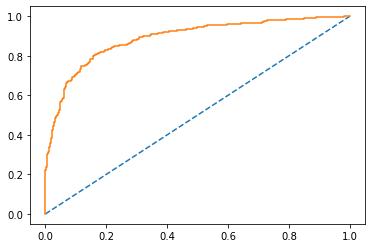

In [185]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.876


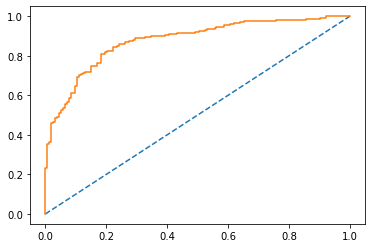

In [186]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [187]:
print("cross validation scores for train dataset")
scores_nb_train = cross_val_score(nb, X_train, y_train, cv=10)
scores_nb_train

cross validation scores for train dataset


array([0.80373832, 0.78301887, 0.8490566 , 0.83962264, 0.90566038,
       0.8490566 , 0.78301887, 0.83962264, 0.81132075, 0.82075472])

In [188]:
print("cross validation scores for test dataset")
scores_nb_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nb_test

cross validation scores for test dataset


array([0.7826087 , 0.80434783, 0.86956522, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.82222222, 0.75555556, 0.82222222])

# Building Gaussian Naive Bayes over balanced data using SMOTE

In [189]:
# fitting NB model into balanced training dataset
nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

GaussianNB()

In [190]:
# predicting and checking accoracy on training dataset
ytrain_predict_nbsm = nb.predict(X_train_res)
print("Accracy of training dataset:", nb.score(X_train_res, y_train_res))

Accracy of training dataset: 0.8355437665782494


In [191]:
# getting confusion matirx and classification report for training dataset
print("Confusion matrix of train dataset")
print(confusion_matrix(y_train_res, ytrain_predict_nbsm)) ## confusion_matrix

#print("Classification report of train dataset")
print(classification_report(y_train_res, ytrain_predict_nbsm))     ## classification_report

Confusion matrix of train dataset
[[631 123]
 [125 629]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       754
           1       0.84      0.83      0.84       754

    accuracy                           0.84      1508
   macro avg       0.84      0.84      0.84      1508
weighted avg       0.84      0.84      0.84      1508



In [192]:
# predicting and getting accuracy score for testing dataset
ytest_predict_nbsm = nb.predict(X_test)
print("Accracy of testing dataset:", nb.score(X_test, y_test))

Accracy of testing dataset: 0.7982456140350878


In [193]:
# printing confusuon matix and classification report for testing datatset
print("Confusion matrix of test dataset")
print(confusion_matrix(y_test, ytest_predict_nbsm))         ## confusion_matrix
print("Classification report of test dataset")
print(classification_report(y_test, ytest_predict_nbsm))    ## classification_report

Confusion matrix of test dataset
[[118  35]
 [ 57 246]]
Classification report of test dataset
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       153
           1       0.88      0.81      0.84       303

    accuracy                           0.80       456
   macro avg       0.77      0.79      0.78       456
weighted avg       0.81      0.80      0.80       456



AUC score and ROC curve for training dataset
AUC: 0.910


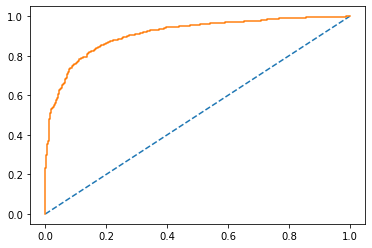

In [194]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.862


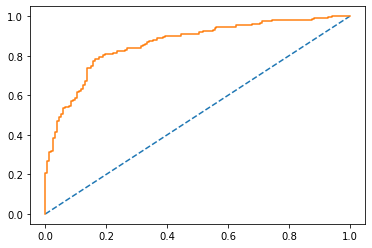

In [195]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [196]:
print("cross validation scores for train dataset")
scores_nbsm_train = cross_val_score(nb, X_train_res, y_train_res, cv=10)
scores_nbsm_train

cross validation scores for train dataset


array([0.76821192, 0.82119205, 0.82781457, 0.77483444, 0.91390728,
       0.82781457, 0.82781457, 0.86092715, 0.8       , 0.87333333])

In [197]:
print("cross validation scores for test dataset")
scores_nbsm_test = cross_val_score(nb, X_test, y_test, cv=10)
scores_nbsm_test

cross validation scores for test dataset


array([0.7826087 , 0.80434783, 0.86956522, 0.80434783, 0.86956522,
       0.86956522, 0.88888889, 0.82222222, 0.75555556, 0.82222222])

# 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

# Random Forest

In [198]:
# building rando forect model
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [199]:
# Performance Matrix on train data set
ytrain_predict_rf = rf.predict(X_train)
print("accuracy score for training dataset:",rf.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_rf))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_rf))

accuracy score for training dataset: 1.0
confusion matrix for training dataset
[[307   0]
 [  0 754]]
classification report for training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [200]:
# Performance Matrix on test data set
ytest_predict_rf = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rf))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rf))

accuracy score for testing dataset: 0.831140350877193
confusion matrix for testing dataset
[[104  49]
 [ 28 275]]
classification report for testing dataste
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Since we can conclude that the model is overfit with data its not required to plot AUC score and ROC curve for this model

# Building random forest model over balanced dataset

In [201]:
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=1)

In [202]:
# Performance Matrix on train data set
ytrain_predict_rfsm = rf.predict(X_train_res)
print("accuracy score for training dataset:",rf.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_rfsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_rfsm))

accuracy score for training dataset: 1.0
confusion matrix for training dataset
[[754   0]
 [  0 754]]
classification report for training dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       754
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1508
   macro avg       1.00      1.00      1.00      1508
weighted avg       1.00      1.00      1.00      1508



In [203]:
# Performance Matrix on test data set
ytest_predict_rfsm = rf.predict(X_test)
print("accuracy score for testing dataset:",rf.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_rfsm))

print("classification report for testing dataste")
print(metrics.classification_report(y_test, ytest_predict_rfsm))

accuracy score for testing dataset: 0.8267543859649122
confusion matrix for testing dataset
[[113  40]
 [ 39 264]]
classification report for testing dataste
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Since we can comclude that the model is overfit with data its not required to plot AUC score and ROC curve for this model

# Bagging

In [204]:
from sklearn.ensemble import BaggingClassifier
Bagging=BaggingClassifier(base_estimator=rf,random_state=1)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [205]:
# Performance Matrix on train data set
ytrain_predict_bagging = Bagging.predict(X_train)
print("accuracy score or training dataset:",Bagging.score(X_train, y_train))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_bagging))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_bagging))

accuracy score or training dataset: 0.9613572101790764
confusion report for training dataset
[[274  33]
 [  8 746]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       307
           1       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.96      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



In [206]:
# Performance Matrix on test data set
ytest_predict_bagging = Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging))

Accuracy score for testing datatset: 0.831140350877193
confusuion matrix for testing dataset
[[102  51]
 [ 26 277]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.80      0.67      0.73       153
           1       0.84      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



AUC score and ROC curve for training dataset
AUC: 0.996


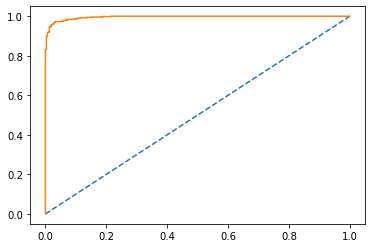

In [207]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.895


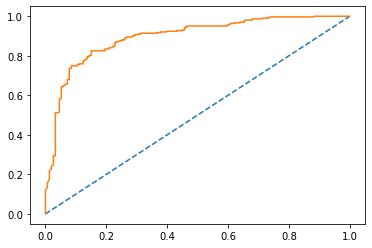

In [208]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [209]:
print("cross validation scores for train dataset")
scores_bagging_train = cross_val_score(Bagging, X_train, y_train, cv=10)
scores_bagging_train

cross validation scores for train dataset


array([0.8411215 , 0.81132075, 0.86792453, 0.8490566 , 0.91509434,
       0.78301887, 0.83018868, 0.79245283, 0.80188679, 0.83962264])

In [210]:
print("cross validation scores for test dataset")
scores_bagging_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_test

cross validation scores for test dataset


array([0.7826087 , 0.76086957, 0.86956522, 0.7173913 , 0.86956522,
       0.84782609, 0.82222222, 0.8       , 0.71111111, 0.77777778])

# bagging on balanced dataset

In [211]:
Bagging.fit(X_train_res, y_train_res)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  random_state=1)

In [212]:
# Performance Matrix on train data set
ytrain_predict_bagging_sm = Bagging.predict(X_train_res)
print("accuracy score or training dataset:",Bagging.score(X_train_res, y_train_res))

print("confusion report for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_bagging_sm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_bagging_sm))

accuracy score or training dataset: 0.9721485411140584
confusion report for training dataset
[[739  15]
 [ 27 727]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       754
           1       0.98      0.96      0.97       754

    accuracy                           0.97      1508
   macro avg       0.97      0.97      0.97      1508
weighted avg       0.97      0.97      0.97      1508



In [213]:
# Performance Matrix on test data set
ytest_predict_bagging_sm= Bagging.predict(X_test)
print("Accuracy score for testing datatset:",Bagging.score(X_test, y_test))

print("confusuion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_bagging_sm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_bagging_sm))

Accuracy score for testing datatset: 0.8114035087719298
confusuion matrix for testing dataset
[[111  42]
 [ 44 259]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       153
           1       0.86      0.85      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC score and ROC curve for training dataset
AUC: 0.997


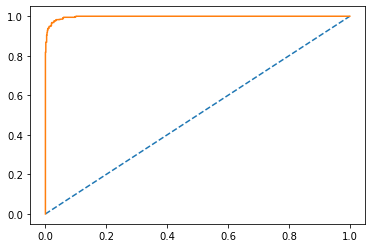

In [214]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.884


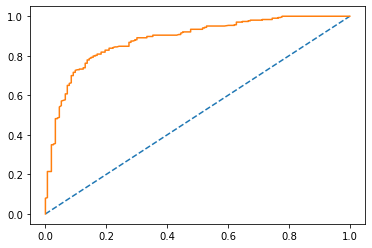

In [215]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = Bagging.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [216]:
print("cross validation scores for train dataset")
scores_bagging_sm_train = cross_val_score(Bagging, X_train_res, y_train_res, cv=10)
scores_bagging_sm_train

cross validation scores for train dataset


array([0.84768212, 0.82781457, 0.83443709, 0.81456954, 0.92715232,
       0.92715232, 0.90728477, 0.88741722, 0.82      , 0.92666667])

In [217]:
print("cross validation scores for test dataset")
scores_bagging_sm_test = cross_val_score(Bagging, X_test, y_test, cv=10)
scores_bagging_sm_test

cross validation scores for test dataset


array([0.7826087 , 0.76086957, 0.86956522, 0.7173913 , 0.86956522,
       0.84782609, 0.82222222, 0.8       , 0.71111111, 0.77777778])

# Ada-Boost

In [218]:
from sklearn.ensemble import AdaBoostClassifier


adb = AdaBoostClassifier(random_state=1)
adb.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [219]:
# Performance Matrix on train data set
ytrain_predict_adb = adb.predict(X_train)

print("Accuracy for training dataset:",adb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_adb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_adb))

Accuracy for training dataset: 0.8463713477851084
confusion matrix for training dataset
[[210  97]
 [ 66 688]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061



In [220]:
# Performance Matrix on test data set
ytest_predict_adb = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adb))

accuracy score for testing dataset: 0.8135964912280702
confusion matrix for testing dataset
[[105  48]
 [ 37 266]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



AUC score and ROC curve for training dataset
AUC: 0.912


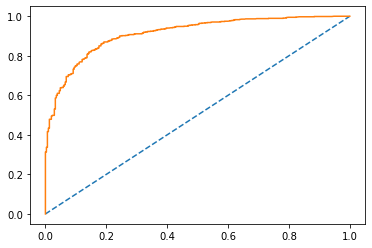

In [221]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.881


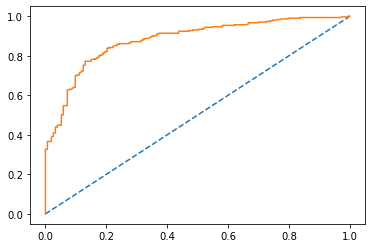

In [222]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [223]:
print("cross validation scores for train dataset")
scores_adb_train = cross_val_score(adb, X_train, y_train, cv=10)
scores_adb_train

cross validation scores for train dataset


array([0.80373832, 0.79245283, 0.83962264, 0.83962264, 0.89622642,
       0.79245283, 0.78301887, 0.8490566 , 0.78301887, 0.85849057])

In [224]:
print("cross validation scores for test dataset")
scores_adb_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_test

cross validation scores for test dataset


array([0.73913043, 0.69565217, 0.80434783, 0.69565217, 0.84782609,
       0.80434783, 0.88888889, 0.77777778, 0.68888889, 0.8       ])

# Ada-Boost on balanced dataset

In [225]:
adb.fit(X_train_res,y_train_res)

AdaBoostClassifier(random_state=1)

In [226]:
# Performance Matrix on train data set
ytrain_predict_adbsm = adb.predict(X_train_res)

print("Accuracy for training dataset:",adb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_adbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_adbsm))

Accuracy for training dataset: 0.8647214854111406
confusion matrix for training dataset
[[660  94]
 [110 644]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       754
           1       0.87      0.85      0.86       754

    accuracy                           0.86      1508
   macro avg       0.86      0.86      0.86      1508
weighted avg       0.86      0.86      0.86      1508



In [227]:
# Performance Matrix on test data set
ytest_predict_adbsm = adb.predict(X_test)
print("accuracy score for testing dataset:",adb.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adbsm))

accuracy score for testing dataset: 0.8201754385964912
confusion matrix for testing dataset
[[119  34]
 [ 48 255]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       153
           1       0.88      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.80       456
weighted avg       0.83      0.82      0.82       456



AUC score and ROC curve for training dataset
AUC: 0.933


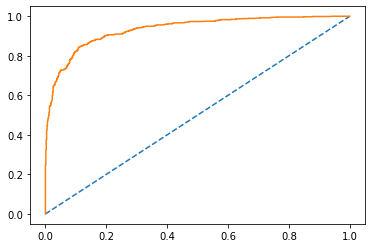

In [228]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.869


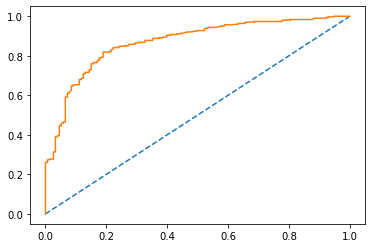

In [229]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = adb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [230]:
print("cross validation scores for train dataset")
scores_adb_sm_train = cross_val_score(adb, X_train_res, y_train_res, cv=10)
scores_adb_sm_train

cross validation scores for train dataset


array([0.77483444, 0.82781457, 0.8410596 , 0.8013245 , 0.9205298 ,
       0.87417219, 0.87417219, 0.88741722, 0.80666667, 0.90666667])

In [231]:
print("cross validation scores for test dataset")
scores_adb_sm_test = cross_val_score(adb, X_test, y_test, cv=10)
scores_adb_sm_test

cross validation scores for test dataset


array([0.73913043, 0.69565217, 0.80434783, 0.69565217, 0.84782609,
       0.80434783, 0.88888889, 0.77777778, 0.68888889, 0.8       ])

# Gradient Boosting

In [232]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [233]:
# Performance Matrix on train data set
ytrain_predict_gb = gb.predict(X_train)
print("accuracy for training dataset:", gb.score(X_train, y_train))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train, ytrain_predict_gb))

print("classification report for training dataset")
print(metrics.classification_report(y_train, ytrain_predict_gb))

accuracy for training dataset: 0.8925541941564562
confusion matrix for training dataset
[[239  68]
 [ 46 708]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [234]:
# Performance Matrix on test data set
ytest_predict_gb = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gb))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gb))

accuracy score for testing dataset: 0.8355263157894737
confusuon matrix for testing dataset
[[105  48]
 [ 27 276]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



AUC score and ROC curve for training dataset
AUC: 0.951


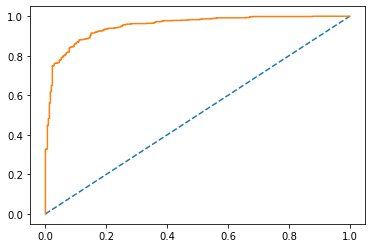

In [235]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.899


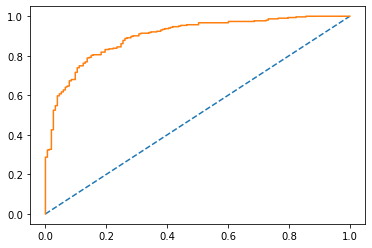

In [236]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [237]:
print("cross validation scores for train dataset")
scores_gb_train = cross_val_score(gb, X_train, y_train, cv=10)
scores_gb_train

cross validation scores for train dataset


array([0.85046729, 0.80188679, 0.81132075, 0.8490566 , 0.88679245,
       0.83962264, 0.81132075, 0.83962264, 0.76415094, 0.85849057])

In [238]:
print("cross validation scores for test dataset")
scores_gb_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_test

cross validation scores for test dataset


array([0.73913043, 0.73913043, 0.86956522, 0.73913043, 0.82608696,
       0.84782609, 0.86666667, 0.82222222, 0.68888889, 0.75555556])

# Gradient Boosting on balanced dataset

In [239]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=1)

In [240]:
# Performance Matrix on train data set
ytrain_predict_gbsm = gb.predict(X_train_res)
print("accuracy for training dataset:", gb.score(X_train_res, y_train_res))

print("confusion matrix for training dataset")
print(metrics.confusion_matrix(y_train_res, ytrain_predict_gbsm))

print("classification report for training dataset")
print(metrics.classification_report(y_train_res, ytrain_predict_gbsm))

accuracy for training dataset: 0.9111405835543767
confusion matrix for training dataset
[[702  52]
 [ 82 672]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       754
           1       0.93      0.89      0.91       754

    accuracy                           0.91      1508
   macro avg       0.91      0.91      0.91      1508
weighted avg       0.91      0.91      0.91      1508



In [241]:
# Performance Matrix on test data set
ytest_predict_gbsm = gb.predict(X_test)
print("accuracy score for testing dataset:", gb.score(X_test, y_test))

print("confusuon matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_gbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_gbsm))

accuracy score for testing dataset: 0.8223684210526315
confusuon matrix for testing dataset
[[120  33]
 [ 48 255]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.71      0.78      0.75       153
           1       0.89      0.84      0.86       303

    accuracy                           0.82       456
   macro avg       0.80      0.81      0.81       456
weighted avg       0.83      0.82      0.82       456



AUC score and ROC curve for training dataset
AUC: 0.963


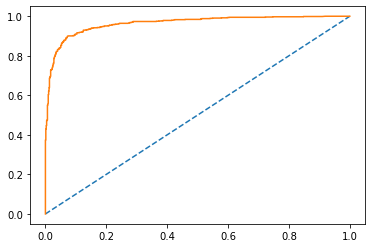

In [242]:
# creating ROC curve and getting AUC score for train data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.885


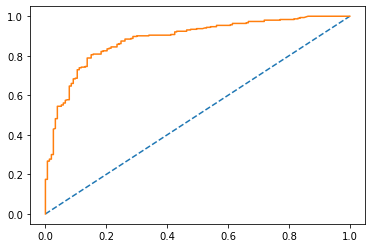

In [243]:
# creating ROC curve and getting AUC score for test data set
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
# predict probabilities
probs = gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [244]:
print("cross validation scores for train dataset")
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=10)
scores_gb_sm_train

cross validation scores for train dataset


array([0.8013245 , 0.83443709, 0.83443709, 0.82781457, 0.92715232,
       0.87417219, 0.90728477, 0.90066225, 0.84      , 0.92666667])

In [245]:
print("cross validation scores for test dataset")
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=10)
scores_gb_sm_test

cross validation scores for test dataset


array([0.73913043, 0.73913043, 0.86956522, 0.73913043, 0.82608696,
       0.84782609, 0.86666667, 0.82222222, 0.68888889, 0.75555556])

# END OF PROBLEM - 1

# PROBLEM -- 2 -- Text Analytics

In [246]:
# lets start with Importing the necessary libraries along with the standard import
import numpy as np 
import pandas as pd 
import re     # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk   # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt  #this is for visualization
import string                    # this is used for string manipulations
import matplotlib                # this is for visualization

In [247]:
# Let us check the version of the various libraries just to track if version is up to date or not
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.2
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.2
Matplotlib version: 3.3.4


In [248]:
# downloading and importing inaugural coupus from nltk and checking for all the text files avialble in this corpus
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [249]:
#checking for total number of text files
print("Total number of text file in inaugural corpus:",len(inaugural.fileids()))

Total number of text file in inaugural corpus: 58


# 2.1 Find the number of characters, words, and sentences for the mentioned documents.


In [250]:
# number of words in speech by Mr. Roosevelt
print("Number of words in speech by Mr. Roosevelt:",len(inaugural.words(fileids='1941-Roosevelt.txt')))

Number of words in speech by Mr. Roosevelt: 1536


In [251]:
# number of words in speech by Mr. Nixon
print("Number of words in speech by Mr. Nixon:",len(inaugural.words(fileids='1973-Nixon.txt')))

Number of words in speech by Mr. Nixon: 2028


In [252]:
# number of words in speech by Mr. Kennedy
print("Number of words in speech by Mr. Kennedy:",len(inaugural.words(fileids='1961-Kennedy.txt')))

Number of words in speech by Mr. Kennedy: 1546


In [253]:
# number of sentences in speech by Mr. Nixon
print("Number of sentences in speech by Mr. Nixon:",len(inaugural.sents(fileids='1973-Nixon.txt')))

Number of sentences in speech by Mr. Nixon: 69


In [254]:
# number of sentences in speech by Mr. Roosevelt
print("Number of sentences in speech by Mr. Roosevelt:",len(inaugural.sents(fileids='1941-Roosevelt.txt')))

Number of sentences in speech by Mr. Roosevelt: 68


In [255]:
# number of sentences in speech by Mr. Kennedy
print("Number of sentences in speech by Mr. Kennedy:",len(inaugural.sents(fileids='1961-Kennedy.txt')))

Number of sentences in speech by Mr. Kennedy: 52


In [256]:
# number of characters in speech by Mr. Kennedy
print("Number of charcaters in speech by Mr. Kennedy:",len(inaugural.raw(fileids='1961-Kennedy.txt')))

Number of charcaters in speech by Mr. Kennedy: 7618


In [257]:
# number of characters in speech by Mr. Roosevelt
print("Number of charcaters in speech by Mr. Roosevelt:",len(inaugural.raw(fileids='1941-Roosevelt.txt')))

Number of charcaters in speech by Mr. Roosevelt: 7571


In [258]:
# number of characters in speech by Mr. Nixon
print("Number of charcaters in speech by Mr. Nixon:",len(inaugural.raw(fileids='1973-Nixon.txt')))

Number of charcaters in speech by Mr. Nixon: 9991


# 2.2 Remove all the stopwords from all three speeches.

Text Analysis Preprocessing

In [259]:
# as we need to work only on 3 text files from the corpus, assigning a new variable to the required text files
nixon = inaugural.raw(fileids='1973-Nixon.txt')
roosevelt = inaugural.raw(fileids='1941-Roosevelt.txt')
kennedy = inaugural.raw(fileids='1961-Kennedy.txt')

In [260]:
# Creating a List of the 3 text files
text_all = [nixon,roosevelt,kennedy]

In [261]:
# creating dataframe of text files
text=pd.DataFrame(text_all,index = ['nixon', 'roosevelt', 'kennedy'],
                                              columns =['speech'])

In [262]:
# checking dataframe
text

,speech
nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
roosevelt,On each national day of inauguration since 178...
kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."


In [263]:
#converting everything to lower case
text['speech'] = text['speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text.head()

,speech
nixon,"mr. vice president, mr. speaker, mr. chief jus..."
roosevelt,on each national day of inauguration since 178...
kennedy,"vice president johnson, mr. speaker, mr. chief..."


In [264]:
# creating stop words variable
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [265]:
#removal of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['speech'] = text['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
text.head()

,speech
nixon,"mr. vice president, mr. speaker, mr. chief jus..."
roosevelt,"national day inauguration since 1789, people r..."
kennedy,"vice president johnson, mr. speaker, mr. chief..."


In [266]:
#removal of punctuation
text['speech'] = text['speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
text.head()

C:\Users\abhay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


,speech
nixon,mr vice president mr speaker mr chief justice ...
roosevelt,national day inauguration since 1789 people re...
kennedy,vice president johnson mr speaker mr chief jus...


In [267]:
# stemming the text files
from nltk.stem import PorterStemmer
st = PorterStemmer()
text['speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

nixon        mr vice presid mr speaker mr chief justic sena...
roosevelt    nation day inaugur sinc 1789 peopl renew sens ...
kennedy      vice presid johnson mr speaker mr chief justic...
Name: speech, dtype: object

In [268]:
# checking the preprocessed dataframe
text.head()

,speech
nixon,mr vice president mr speaker mr chief justice ...
roosevelt,national day inauguration since 1789 people re...
kennedy,vice president johnson mr speaker mr chief jus...


# 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) 

In [270]:
# geting top 3 used in speech of Mr. Nixon
all_Words1=[x for x in pd.Series(' '.join(text.loc['nixon']).split())] 
print("The top most three words used in speech by Mr. Nixon:",nltk.FreqDist(all_Words1).most_common(3))

The top most three words used in speech by Mr. Nixon: [('us', 26), ('let', 22), ('peace', 19)]


In [271]:
# geting top 3 used in speech of Mr. roosevelt
all_Words2=[x for x in pd.Series(' '.join(text.loc['roosevelt']).split())] 
print("The top most three words used in speech by Mr. Roosevelt:",nltk.FreqDist(all_Words2).most_common(3))

The top most three words used in speech by Mr. Roosevelt: [('nation', 11), ('know', 10), ('spirit', 9)]


In [272]:
# geting top 3 used in speech of Mr. Kennedy
all_Words3=[x for x in pd.Series(' '.join(text.loc['kennedy']).split())] 
print("The top most three words used in speech by Mr. Kennedy:",nltk.FreqDist(all_Words3).most_common(3))

The top most three words used in speech by Mr. Kennedy: [('let', 16), ('us', 12), ('world', 8)]


In [273]:
# From above we can see that after removing stopwords, the words "us", "let" and "new" is used the most however these words wont play important part in analytics. I am considering these as extension of stopwords. Hence removing them
freq =['us','let','new', 'know']

In [274]:
text['speech'] = text['speech'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
text['speech'].head()

nixon        mr vice president mr speaker mr chief justice ...
roosevelt    national day inauguration since 1789 people re...
kennedy      vice president johnson mr speaker mr chief jus...
Name: speech, dtype: object

In [275]:
# geting top 3 used in speech of Mr. Nixon after removing few more stopwords
all_Words4=[x for x in pd.Series(' '.join(text.loc['nixon']).split())] 
print("The top most three words used in speech by Mr. Nixon:",nltk.FreqDist(all_Words4).most_common(3))

The top most three words used in speech by Mr. Nixon: [('peace', 19), ('world', 16), ('america', 13)]


In [276]:
# geting top 3 used in speech of Mr. roosevelt after removing few more stop words
all_Words5=[x for x in pd.Series(' '.join(text.loc['roosevelt']).split())] 
print("The top most three words used in speech by Mr. Roosevelt:",nltk.FreqDist(all_Words5).most_common(3))

The top most three words used in speech by Mr. Roosevelt: [('nation', 11), ('spirit', 9), ('democracy', 9)]


In [277]:
# geting top 3 used in speech of Mr. Kennedy after removing few more stop words
all_Words6=[x for x in pd.Series(' '.join(text.loc['kennedy']).split())] 
print("The top most three words used in speech by Mr. Kennedy:",nltk.FreqDist(all_Words6).most_common(3))

The top most three words used in speech by Mr. Kennedy: [('world', 8), ('sides', 8), ('pledge', 7)]


# 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [278]:
# checking new dataframe
print(text)

                                                      speech
nixon      mr vice president mr speaker mr chief justice ...
roosevelt  national day inauguration since 1789 people re...
kennedy    vice president johnson mr speaker mr chief jus...


In [279]:
# assigning new variable
nixon_new = text.loc['nixon']

In [280]:
# checking new variable
nixon_new

speech    mr vice president mr speaker mr chief justice ...
Name: nixon, dtype: object

In [281]:
# assigning new variable
roosevelt_new = text.loc["roosevelt"]

In [282]:
#checking new variable
roosevelt_new

speech    national day inauguration since 1789 people re...
Name: roosevelt, dtype: object

In [283]:
#assigning new variable
kennedy_new = text.loc["kennedy"]

In [284]:
#checking new variable
kennedy_new

speech    vice president johnson mr speaker mr chief jus...
Name: kennedy, dtype: object

In [285]:
#new word cloude variable
wc_nixon = ' '.join(nixon_new)

Word Cloud of speech by Mr. Nixon


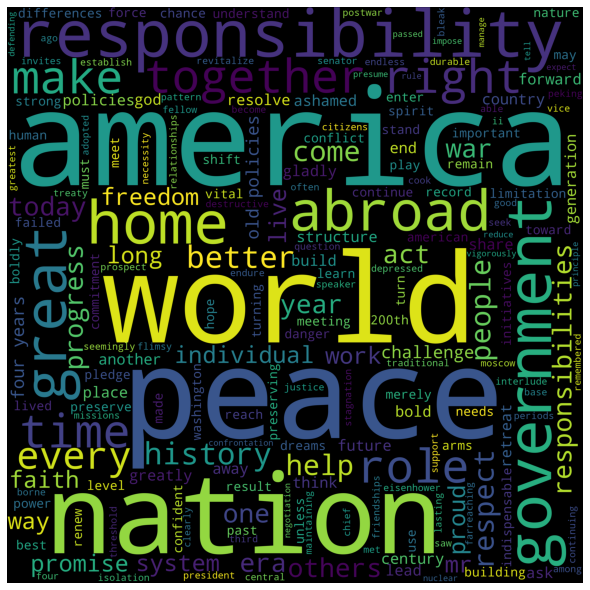

In [286]:
# Word Cloud of speech from Mr. Nixon
from wordcloud import WordCloud
wordcloud1 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of speech by Mr. Nixon")
plt.show()

In [287]:
# assigning new word cloude variable
wc_roosevelt = ' '.join(roosevelt_new)

Word Cloud of speech by Mr. Roosevelt


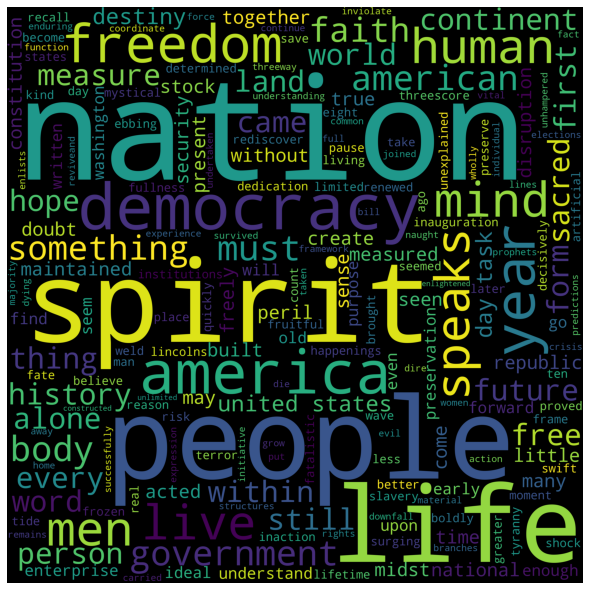

In [288]:
# Word Cloud of speech from Mr. roosevelt
from wordcloud import WordCloud
wordcloud2 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of speech by Mr. Roosevelt")
plt.show()

In [289]:
# assigning new word cloude variable for Mr. Kennedy
wc_kennedy = ' '.join(kennedy_new)

Word Cloud of speech by Mr. Kennedy


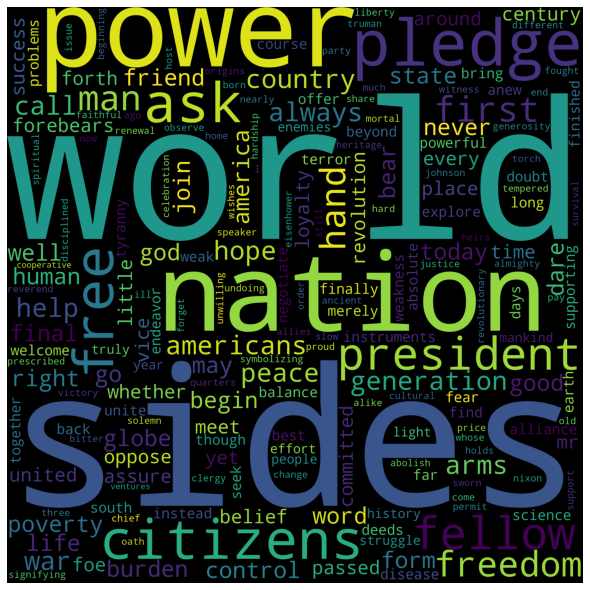

In [290]:
# Word Cloud of speech from Mr. Kennedy
from wordcloud import WordCloud
wordcloud3 = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud3) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud of speech by Mr. Kennedy")
plt.show()

# END OF PROBLEM - 2